In [1]:
import chromatic

chromatic.version()

/Users/harshinisunil/opt/anaconda3/envs/limbs/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'0.3.14'

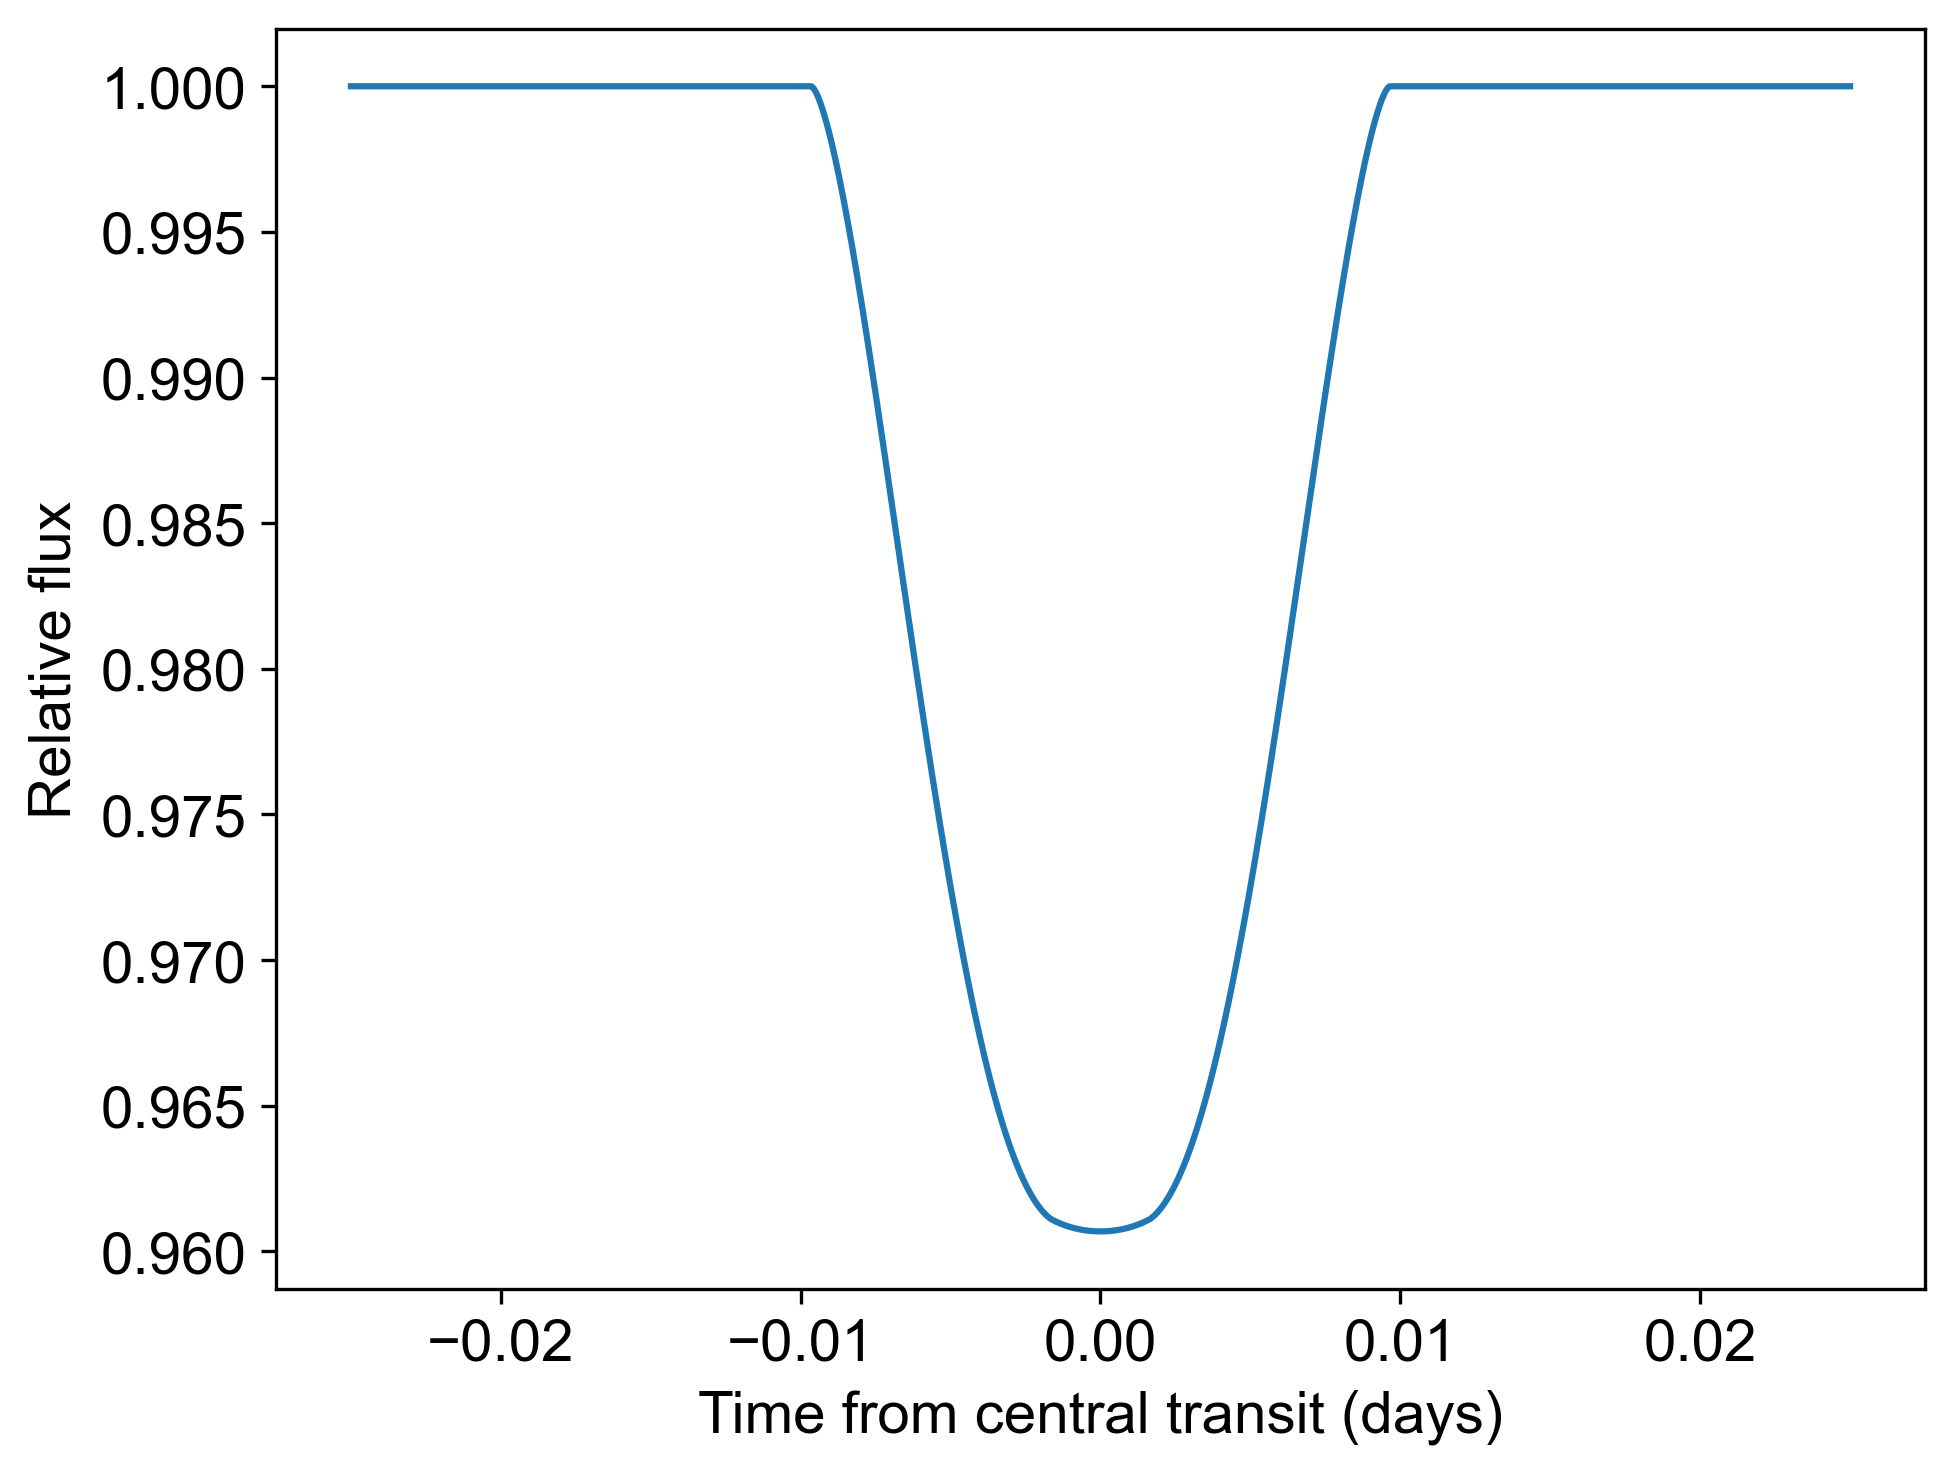

In [2]:
# The batman package: fast computation of exoplanet transit light curves
# Copyright (C) 2015 Laura Kreidberg	 
# 
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
# 
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

import batman
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
   
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
matplotlib.rcParams.update({'font.size':14})

params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = .2  #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model
   
t = np.linspace(-0.025, 0.025, 1000)    	#times at which to calculate light curve	
m = batman.TransitModel(params, t)	        #initializes model
flux = m.light_curve(params)

plt.plot(t, flux)
plt.xlabel("Time from central transit (days)")
plt.ylabel("Relative flux")
#plt.ylim((0.869, 1.001))
plt.savefig("lc.png")
plt.show()

In [3]:
# play around with transit parameters: start with 0.1 planet radius, make comments about what changes
    #plot two different curves
    
# focus on limb darkening parameters: explore values that range from 0-1 (maybe -1,1) for both U values

# make a plot of I(mu) as a function of mu for different parameters
#plot I vs mu and maybe I vs x

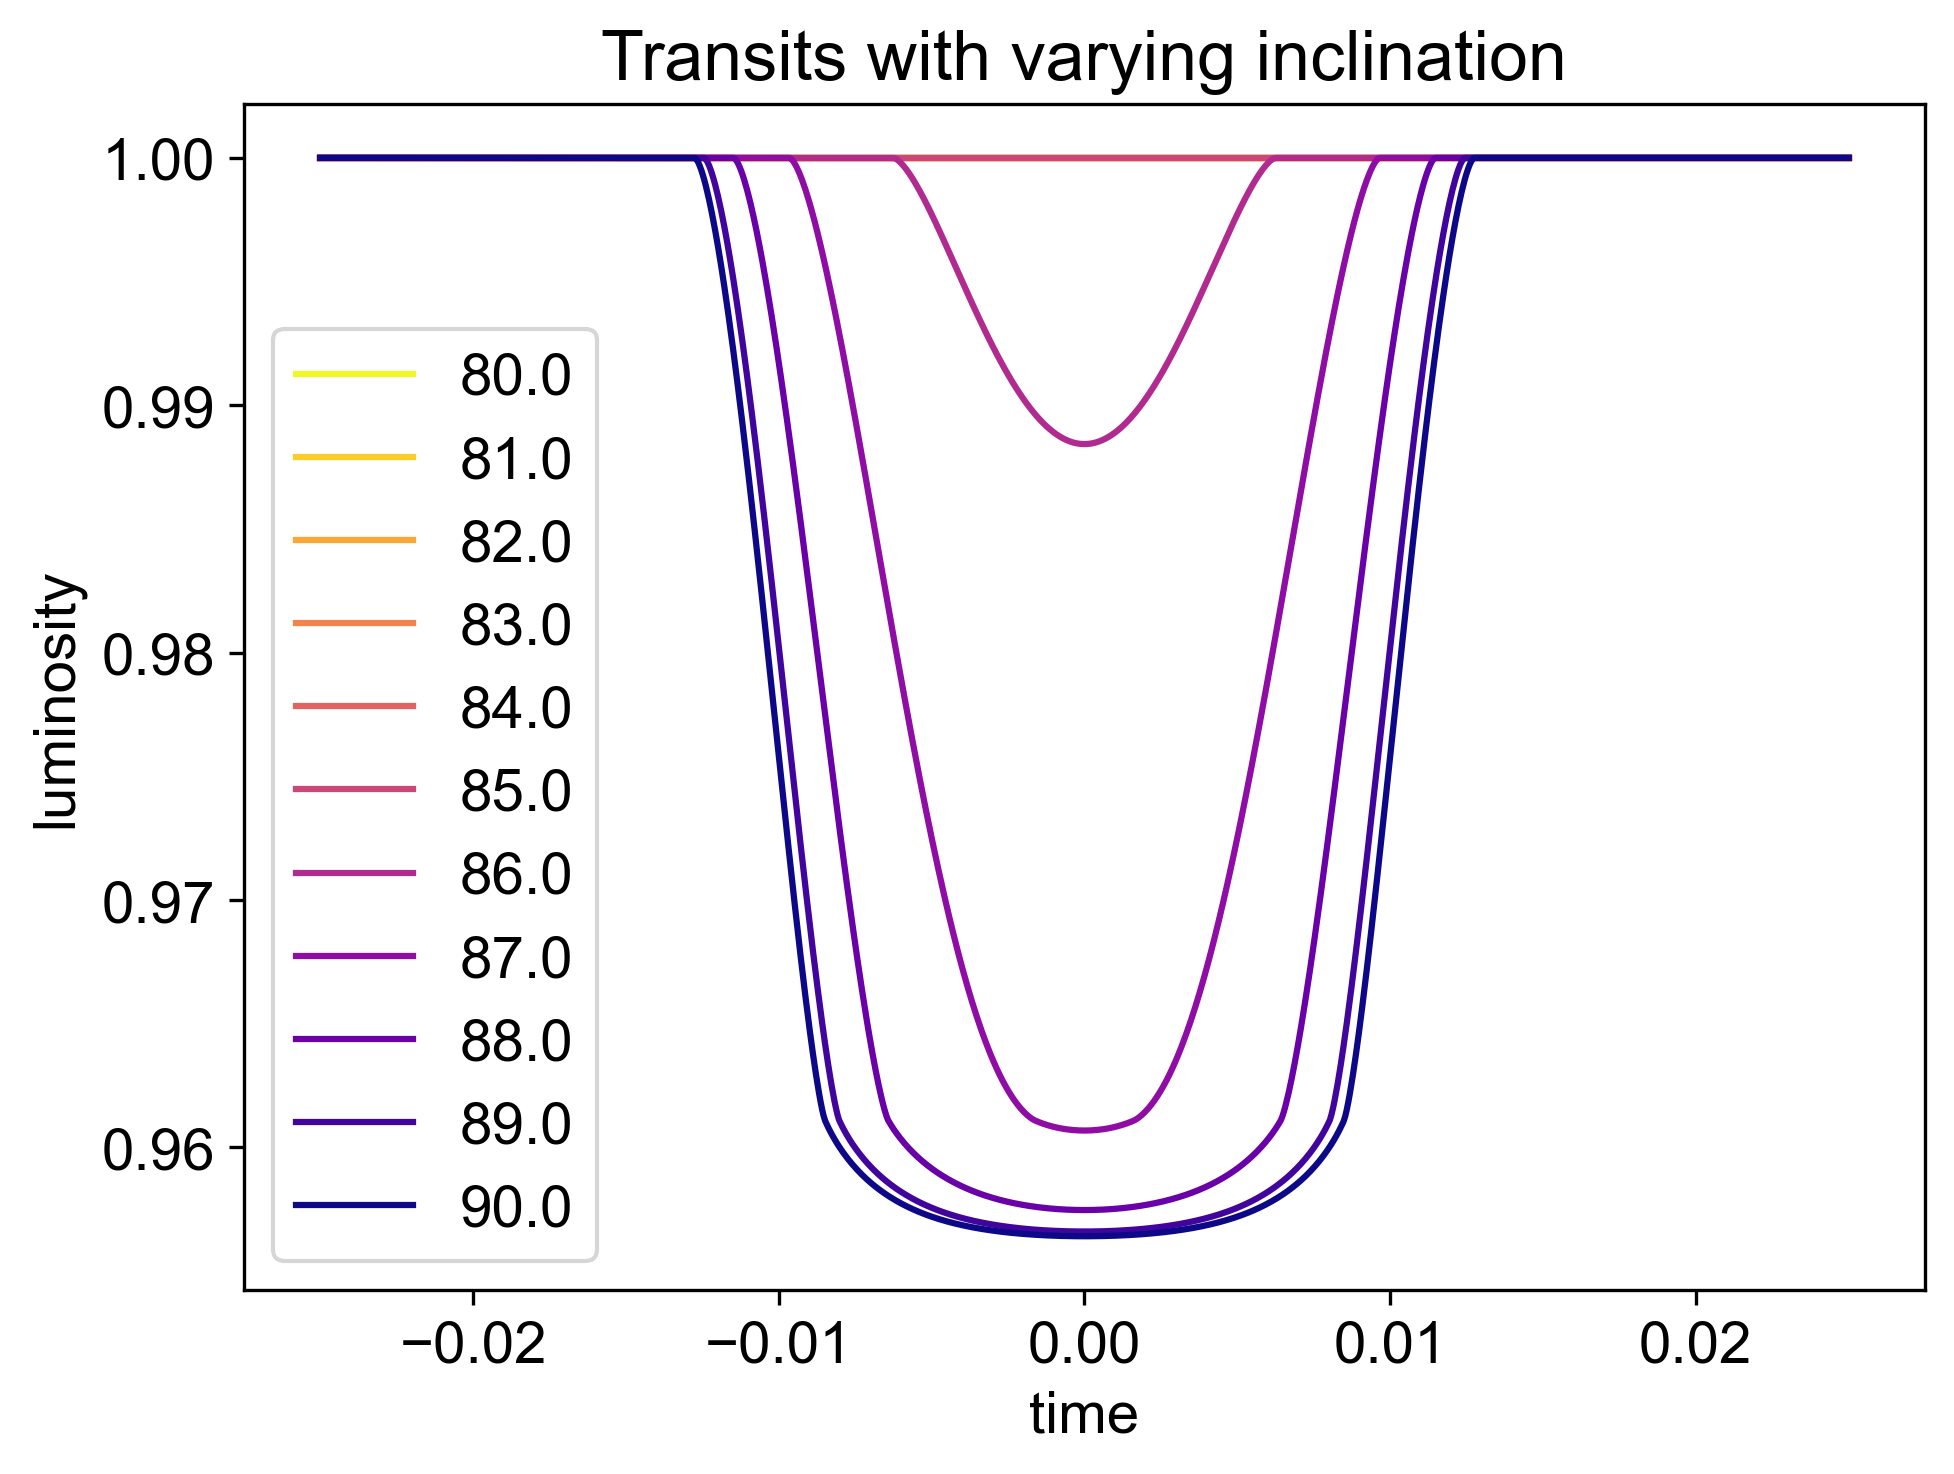

In [4]:
flux = m.light_curve(params) 
from matplotlib import cm

inc = np.linspace(80, 90, 11)
for i in inc:
        params.inc = i                           #updates planet radius
        new_flux = m.light_curve(params)        #recalculates light curve
        plt.title("Transits with varying inclination")
        plt.xlabel("time")
        plt.ylabel("luminosity")
        #colormap = cm.plasma
        plt.plot (t, new_flux, color = cm.plasma((90-i)/10))
        plt.legend(inc)

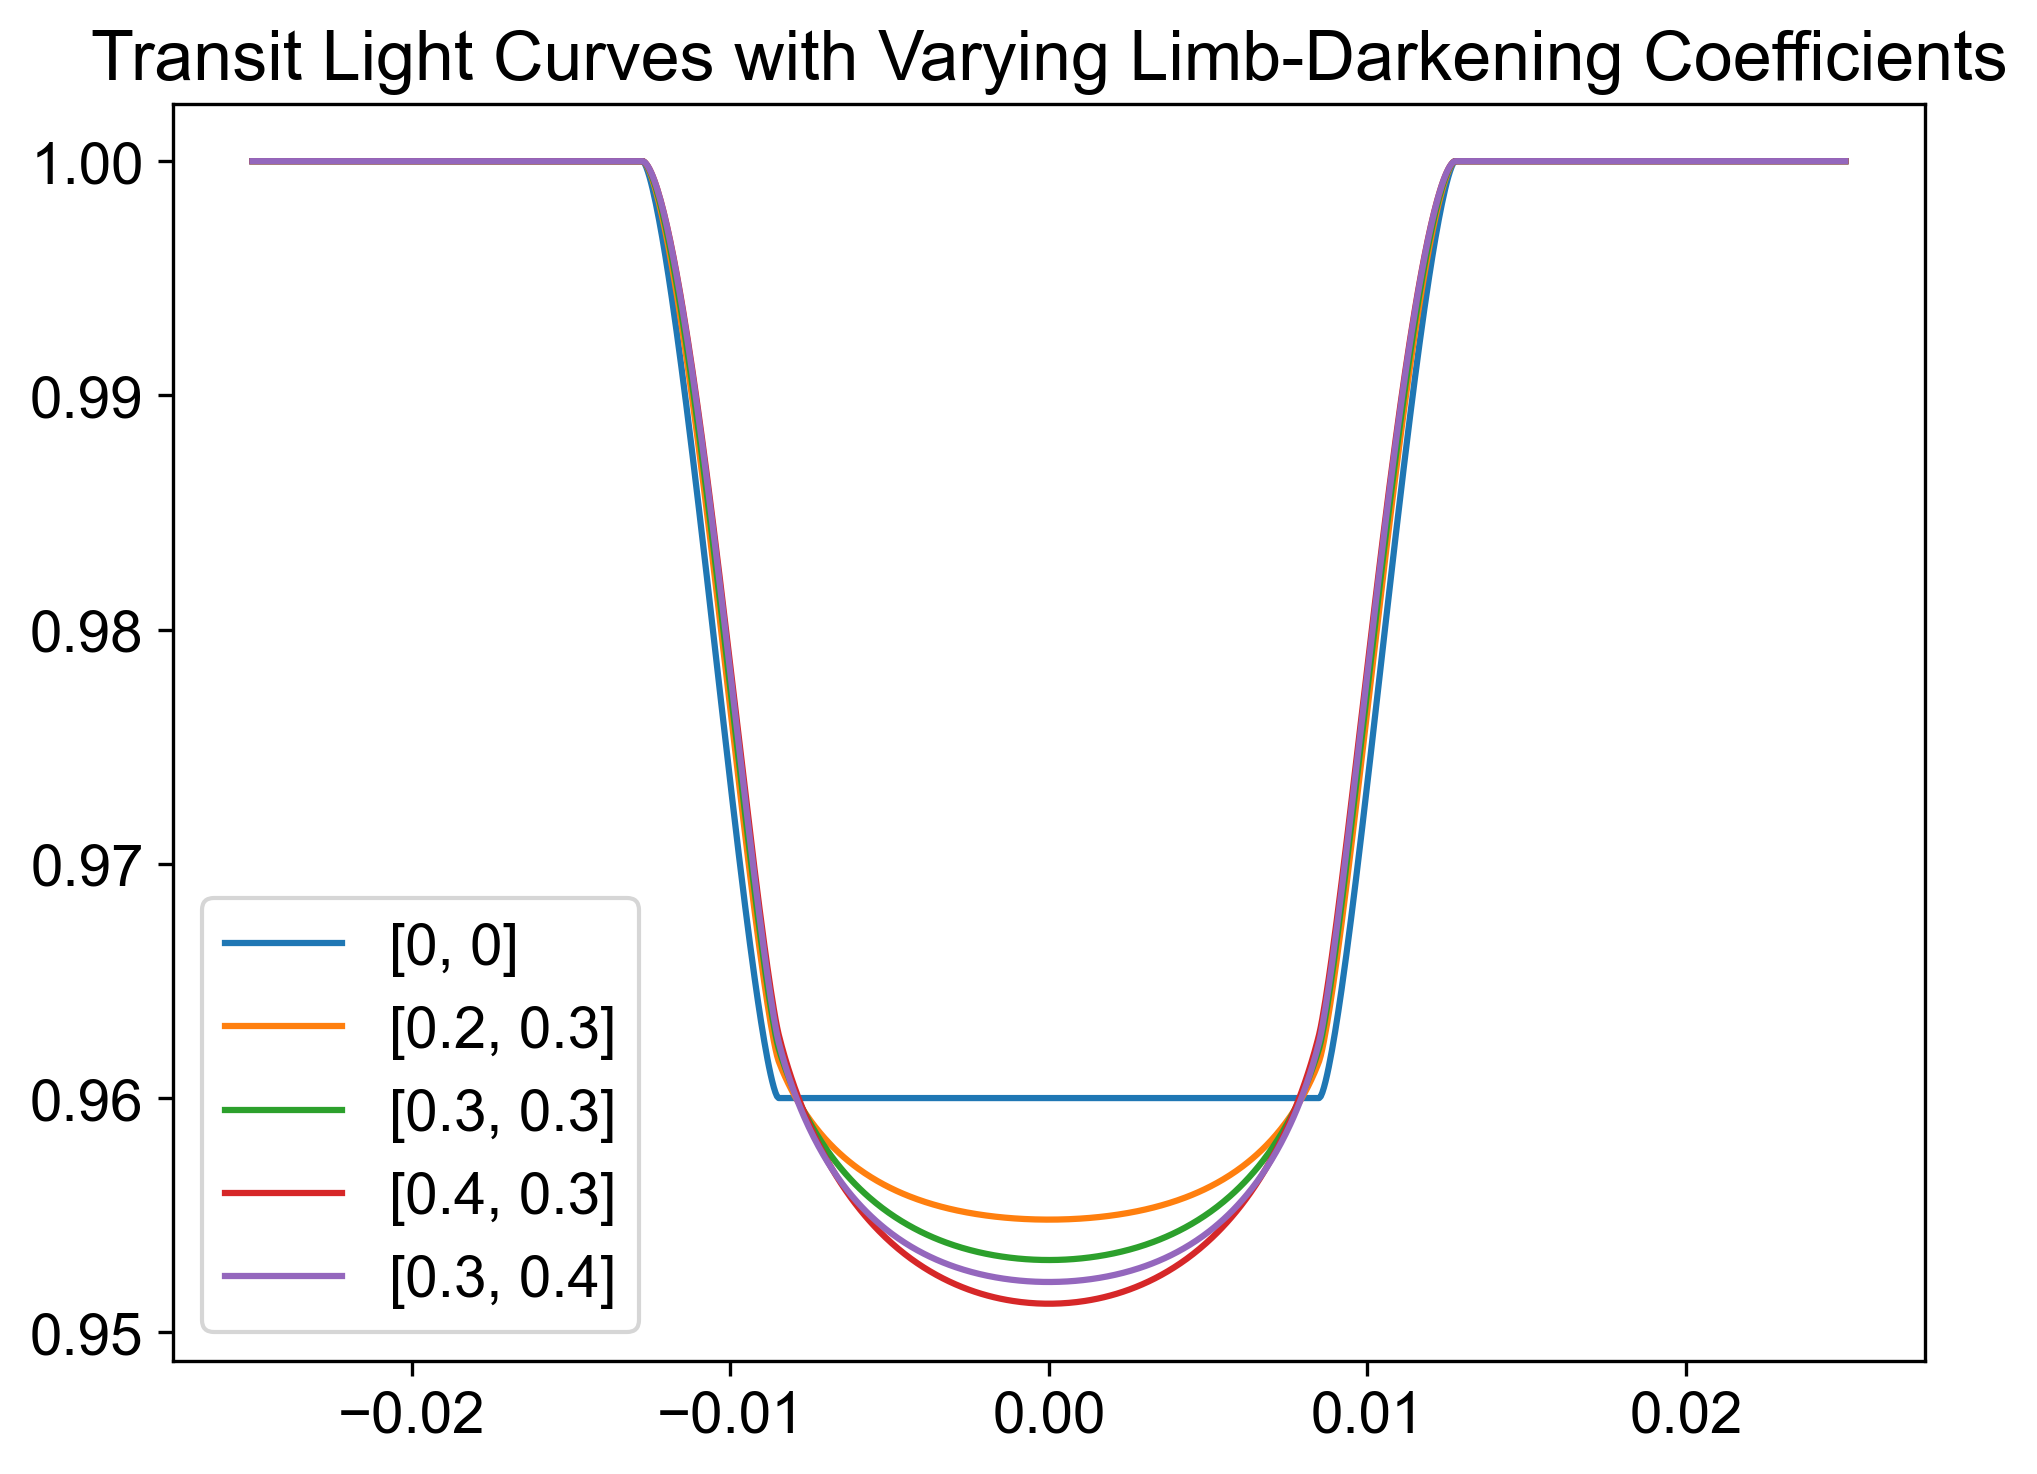

In [5]:
ld_options = ["quadratic", "quadratic", "quadratic", "quadratic", "quadratic"]
ld_coefficients = [[0, 0], [0.2, 0.3], [0.3, 0.3], [0.4, 0.3], [0.3, 0.4], [0.5, 0.9]]

plt.figure()

for i in range(5):
        params.limb_dark = ld_options[i]          #specifies the LD profile
        params.u = ld_coefficients[i]             #updates LD coefficients
        m = batman.TransitModel(params, t)        #initializes the model
        flux = m.light_curve(params)              #calculates light curve
        plt.plot(t, flux, label = ld_options[i])
        plt.legend(ld_coefficients)
        plt.title("Transit Light Curves with Varying Limb-Darkening Coefficients")

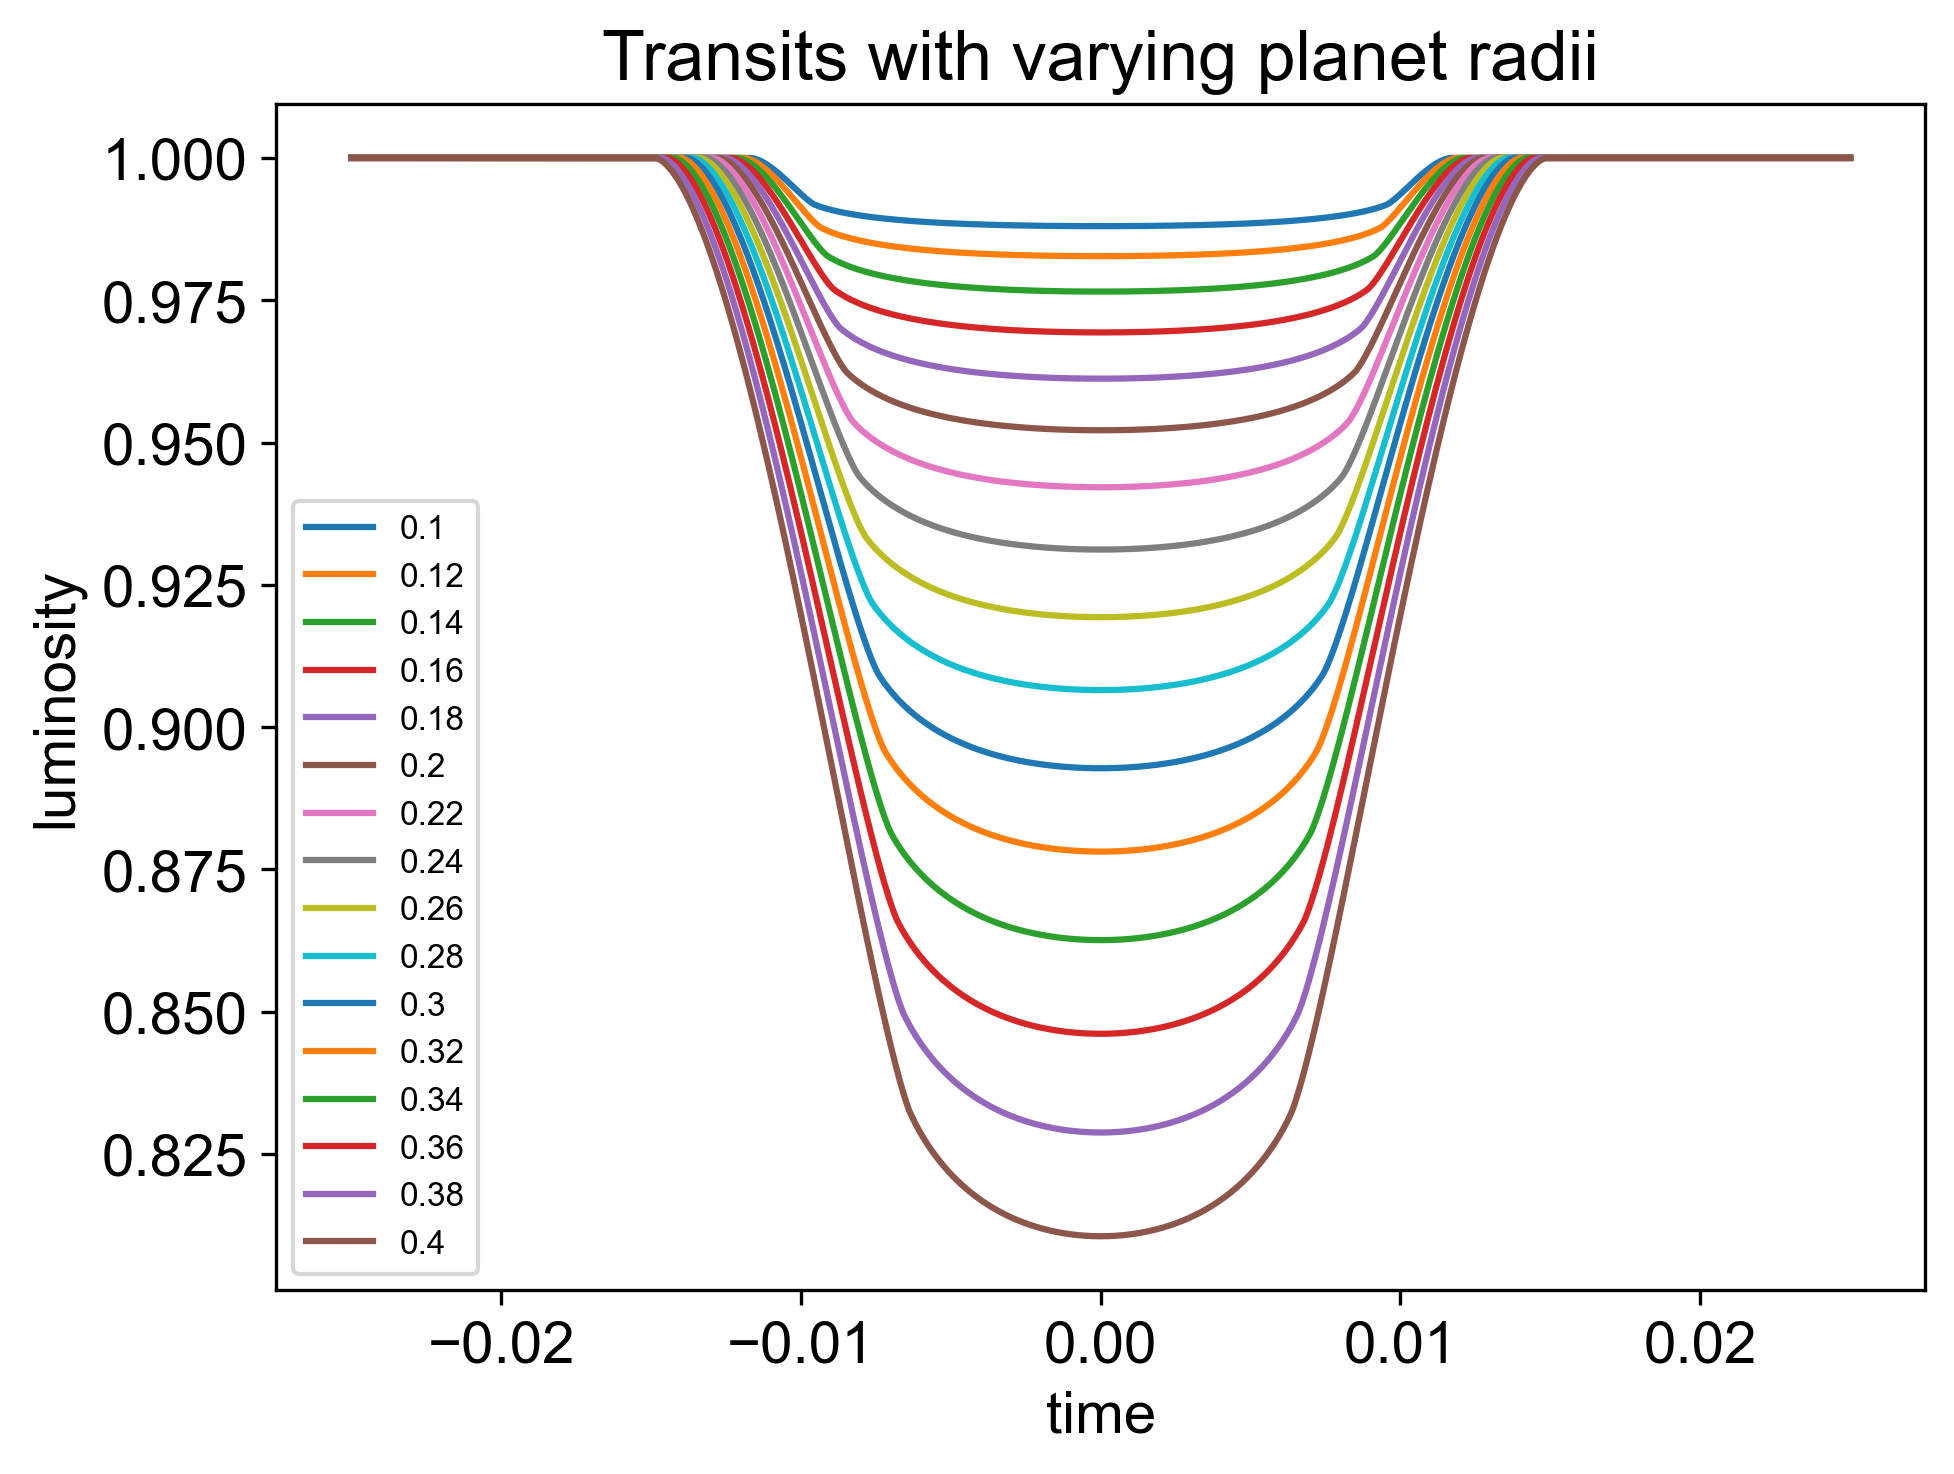

In [6]:
flux = m.light_curve(params) 

radii = np.linspace(0.1, 0.4, 16)
for r in radii:
        params.rp = r                           #updates planet radius
        new_flux = m.light_curve(params)        #recalculates light curve
        plt.title("Transits with varying planet radii")
        plt.xlabel("time")
        plt.ylabel("luminosity")
        plt.plot (t, new_flux)
        radii = np.round(radii, 2)
        plt.legend(radii, prop = { "size": 8 }, loc ="lower left")